In [1]:
# This document demonstrates my ability for k-means clustering.

In [2]:
# Import libraries
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

# Ingest data from csv
df = pd.read_csv(
    "assets/Business_employment_data.csv", index_col=0
)  # Read csv into a dataframe
df.head()  # Display outputs

,series_reference,region_name,filled jobs,filled jobs revised,filled jobs diff,filled jobs % diff,total_earnings,total earnings revised,earnings diff,earnings % diff
period,,,,,,,,,,
2020.09,BDCQ.SED1RA,Northland,65520,65904,384,0.6,953,959,6,0.6
2020.09,BDCQ.SED1RB,Auckland,708372,714506,6134,0.9,12420,12530,110,0.9
2020.09,BDCQ.SED1RC,Waikato,198776,200265,1489,0.7,3041,3058,17,0.6
2020.09,BDCQ.SED1RD,Bay of Plenty,127323,128540,1217,1.0,1881,1899,18,1.0
2020.09,BDCQ.SED1RE,Gisborne,20417,20632,215,1.1,276,279,3,1.1


In [3]:
# Based on our previous analysis, we can see some sort of clustering between 'filled_jobs' and 'total_earnings.' 
# In this file, let's further analyze this relationship. 

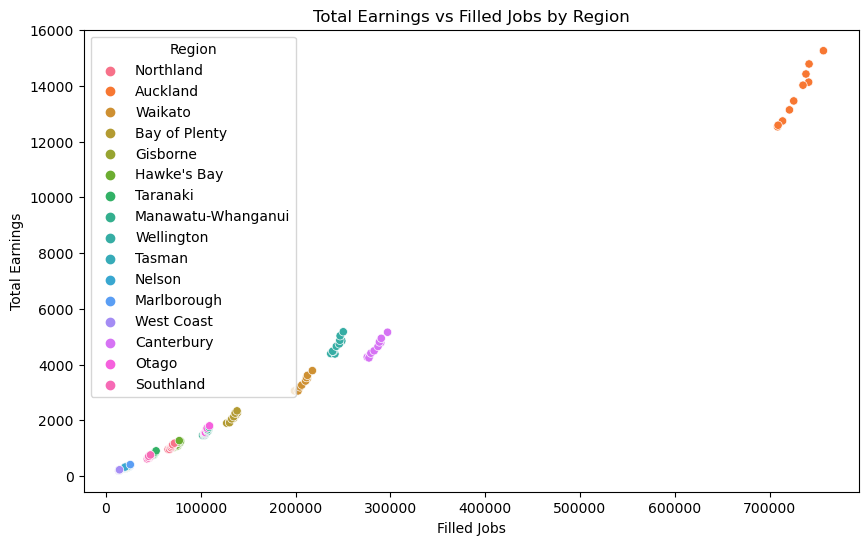

In [4]:
df['filled_jobs'] = pd.to_numeric(df['filled jobs revised'], errors='coerce')
df['total_earnings'] = pd.to_numeric(df['total earnings revised'], errors='coerce')

# Create a scatter plot of total earnings vs filled jobs by region using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='filled jobs', y='total_earnings', hue='region_name')
plt.title('Total Earnings vs Filled Jobs by Region')
plt.xlabel('Filled Jobs')
plt.ylabel('Total Earnings')
plt.legend(title='Region')

plt.show()

In [5]:
# Data cleaning
df = df.drop_duplicates() 
df['filled_jobs'].fillna(df['filled_jobs'].mean(), inplace=True) # Fill missing values
df['total_earnings'].fillna(df['filled_jobs'].mean(), inplace=True)
df.head

<bound method NDFrame.head of         series_reference    region_name  filled jobs  filled jobs revised  \
period                                                                      
2020.09      BDCQ.SED1RA      Northland        65520                65904   
2020.09      BDCQ.SED1RB       Auckland       708372               714506   
2020.09      BDCQ.SED1RC        Waikato       198776               200265   
2020.09      BDCQ.SED1RD  Bay of Plenty       127323               128540   
2020.09      BDCQ.SED1RE       Gisborne        20417                20632   
...                  ...            ...          ...                  ...   
2022.12      BDCQ.SED1RL    Marlborough        25707                25909   
2022.12      BDCQ.SED1RM     West Coast        14315                14347   
2022.12      BDCQ.SED1RN     Canterbury       296998               299921   
2022.12      BDCQ.SED1RO          Otago       109243               110509   
2022.12      BDCQ.SED1RP      Southland       

In [6]:
# Let's go ahead to perform KMeans.

from sklearn.cluster import KMeans

# Select relevant columns for clustering
data = df[['filled_jobs', 'total_earnings']]
# K-means clustering
kmeans = KMeans(n_clusters=2) 
kmeans.fit(data)
# Add cluster labels to the dataframe
df['cluster_label'] = kmeans.labels_
# Print the updated dataframe
print(df.head())

        series_reference    region_name  filled jobs  filled jobs revised  \
period                                                                      
2020.09      BDCQ.SED1RA      Northland        65520                65904   
2020.09      BDCQ.SED1RB       Auckland       708372               714506   
2020.09      BDCQ.SED1RC        Waikato       198776               200265   
2020.09      BDCQ.SED1RD  Bay of Plenty       127323               128540   
2020.09      BDCQ.SED1RE       Gisborne        20417                20632   

         filled jobs diff  filled jobs % diff  total_earnings  \
period                                                          
2020.09               384                 0.6             959   
2020.09              6134                 0.9           12530   
2020.09              1489                 0.7            3058   
2020.09              1217                 1.0            1899   
2020.09               215                 1.1             279   

    

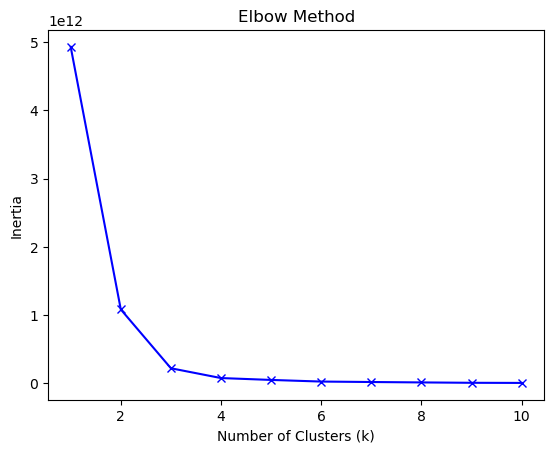

In [7]:
# Elbow method to determine the optimal number of clusters (k)
from sklearn.cluster import KMeans

inertia = [] 
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, inertia, 'bx-') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Inertia') 
plt.title('Elbow Method') 
plt.show()

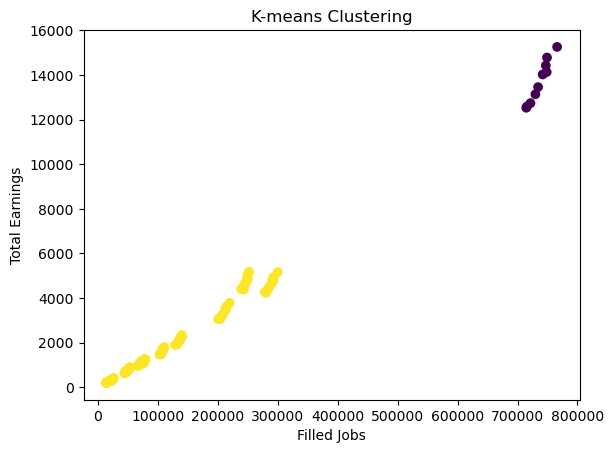

In [8]:
# It looks like 2 clusters are a great choice. Let's visualize the K-means clusters on a graph.

# Select relevant columns for clustering
data = df[['filled_jobs', 'total_earnings']]

# K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Add cluster labels to the dataframe
df['cluster_label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['filled_jobs'], df['total_earnings'], c=df['cluster_label'], cmap='viridis')
plt.xlabel('Filled Jobs')
plt.ylabel('Total Earnings')
plt.title('K-means Clustering')
plt.show()